# Analysis read length

This notebook analysis the distribution of read length (raw reads).

In [1]:
from collections import defaultdict
import gzip
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_read_length(path):
    counter = defaultdict(int)
    with open(path) as f:
        for i, line in enumerate(f):
            if i == 0:
                continue
            length, count = line.strip("\n").split("\t")
            counter[int(length)] += int(count)
    return counter

def get_mean(counter):
    length_total = 0
    count_total = 0
    for length, count in counter.items():
        length_total += length * count
        count_total += count
    if count_total == 0:
        return np.nan
    return length_total / count_total

def get_median(counter):
    items = list(sorted(counter.items()))
    count_total = sum([item[1] for item in items])
    if count_total == 0:
        return np.nan
    if count_total % 2 == 0:
        v1, v2 = None, None
        i2 = int(count_total / 2)
        i1 = i2 - 1
        i0 = 0
        for length, count in items:
            i0 += count
            if i1 < i0 and v1 is None:
                v1 = length
            if i2 < i0:
                v2 = length
                break
        return (v1 + v2) / 2
    else:
        i = int(count_total / 2)
        i0 = 0
        for length, count in items:
            i0 += count
            if i < i0:
                return length

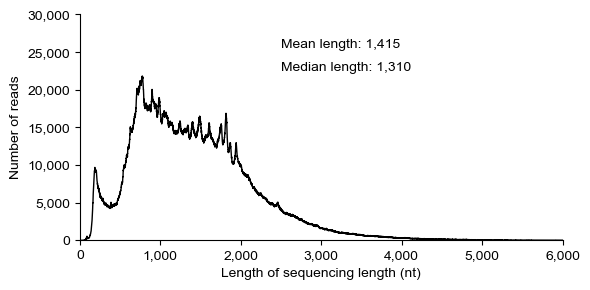

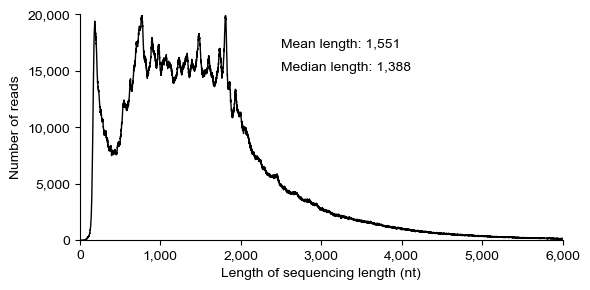

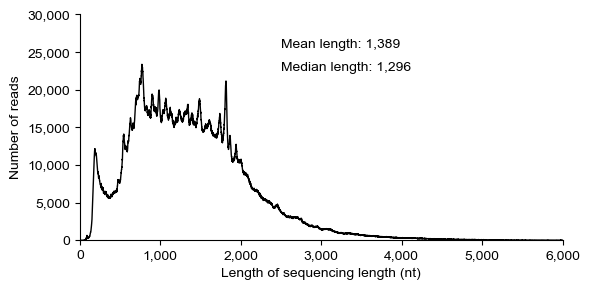

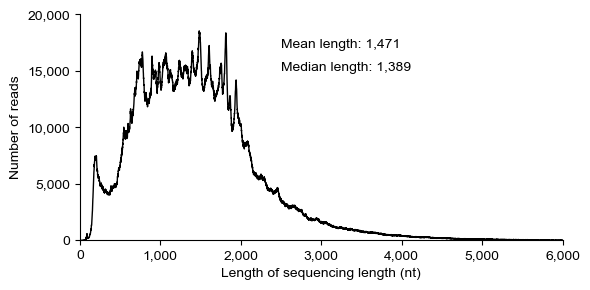

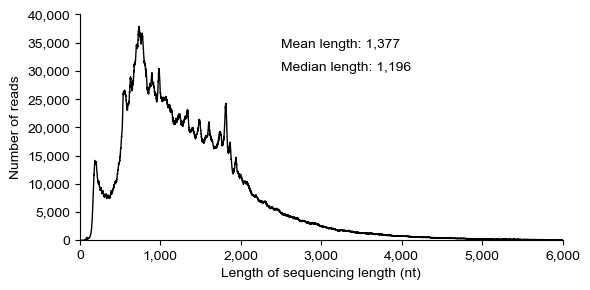

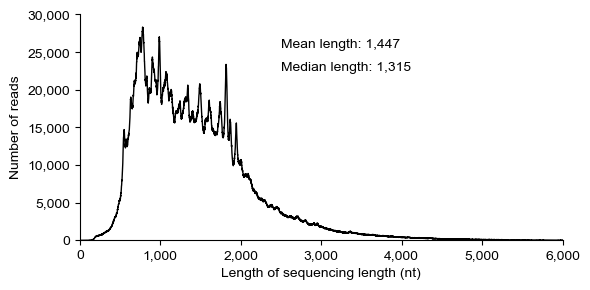

In [10]:
runs = ["20220719_K562R1", "20220719_K562R2", "20220719_K562R3", "20220719_K562R4", "20220729_K562R1", "20220729_K562R2"]
for run in runs:
    counter = load_read_length("../../1_FLAIRseq/results/qc/read_length/%s.tsv" % run)
    xs = np.arange(6000)
    ys = np.array([counter[x] for x in xs])
    ys = ys
    xlim = 6000
    ylim = (int(max(ys)/10000) + 1) * 10000
    plt.figure(figsize=(6, 3))
    plt.plot(xs, ys, color="black", lw=1)
    plt.text(2500, ylim * 0.85, "Mean length: %s" % format(int(get_mean(counter)), ","))
    plt.text(2500, ylim * 0.75, "Median length: %s" % format(int(get_median(counter)), ","))
    plt.xlim(0, xlim)
    plt.ylim(0, ylim)
    xs1 = np.arange(0, xlim + 1, 1000)
    ys1 = np.arange(0, ylim + 1, 5000)
    plt.xticks(xs1, [format(x, ",") for x in xs1])
    plt.yticks(ys1, [format(y, ",") for y in ys1])
    plt.xlabel("Length of sequencing length (nt)")
    plt.ylabel("Number of reads")
    for loc in ["right", "top"]:
        plt.gca().spines[loc].set_visible(False)
    plt.tight_layout()
    plt.savefig("figures/read_length_distribution.%s.pdf" % run)